In [54]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [55]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

X_train = train_df.drop(["HiringDecision", "Age", "DistanceFromCompany", "Gender",'PreviousCompanies'], axis=1)
y_train = train_df["HiringDecision"]

X_test = test_df.drop(["HiringDecision", "Age", "DistanceFromCompany", "Gender",'PreviousCompanies'], axis=1)
y_test = test_df["HiringDecision"]

In [56]:
X_test.head()

,EducationLevel,ExperienceYears,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,2,6,95,70,22,2
1,4,9,60,25,4,3
2,3,1,96,71,96,2
3,2,1,10,95,44,2
4,1,13,78,7,32,2


In [57]:
try:
    best_xgboost_model = joblib.load('best_xgboost_model.pkl')
    print("Model berhasil dimuat.")
except FileNotFoundError:
    print("File 'best_xgboost_model.pkl' tidak ditemukan. Pastikan path sudah benar.")

Model berhasil dimuat.


In [58]:
def bin_experience(x):
    bins = np.array(x).astype(int).ravel()
    labels = []
    for v in bins:
        if v <=2:
            labels.append("Junior")
        elif v <=5:
            labels.append("Mid")
        else:
            labels.append("Senior")
    return np.array(labels).reshape(-1,1)
loaded_pipeline = joblib.load("preprocesor.pkl")
loaded_model = joblib.load("best_xgboost_model.pkl")

# Gunakan pipeline untuk mentransformasi data baru secara langsung
# Data yang dimasukkan ke pipeline ini harus sama dengan kolom pada X_train

X_test_transformed = loaded_pipeline.transform(X_test)
feature_names = loaded_pipeline.get_feature_names_out()

X_test_transformed = pd.DataFrame(
    X_test_transformed,
    columns=feature_names,
    index=X_test.index
)

# Lakukan prediksi
prediction = loaded_model.predict(X_test_transformed)

print("Prediksi untuk data baru:", prediction)

Prediksi untuk data baru: [0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0]


In [59]:
X_test_transformed

,education__EducationLevel_2,education__EducationLevel_3,education__EducationLevel_4,experience__ExperienceYears_Mid,experience__ExperienceYears_Senior,recruitment__RecruitmentStrategy_2,recruitment__RecruitmentStrategy_3,num__InterviewScore,num__SkillScore,num__PersonalityScore
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.530590,0.630528,-0.942264
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.306491,-0.900223,-1.553224
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.565564,0.664544,1.569459
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.442222,1.480945,-0.195535
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.936028,-1.512523,-0.602842
...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.691208,0.630528,-0.127651
296,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.672788,-1.206373,1.399748
297,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.005976,-0.696123,1.196095
298,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.722016,1.174794,-1.044091


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, f1_score, roc_auc_score

from sklearn.metrics import precision_score, f1_score, roc_auc_score

def evaluate_by_subset(model, X, y, feature_prefix, pipeline, original_feature_name):
    results = []

    # ambil OneHotEncoder dari pipeline
    ohe = None
    for name, trans, cols in pipeline.transformers_:
        if name == feature_prefix.replace("__",""):  # misalnya "recruitment" dari "recruitment__"
            if hasattr(trans, "named_steps"):  
                # kalau pakai pipeline (ada FunctionTransformer + OneHotEncoder)
                for step_name, step in trans.named_steps.items():
                    if isinstance(step, OneHotEncoder):
                        ohe = step
                        break
            elif isinstance(trans, OneHotEncoder):
                ohe = trans
            break

    if ohe is not None:
        categories = list(ohe.categories_[0])  # kategori asli
        baseline_category = categories[0]      # kategori yang di-drop

    subset_cols = [col for col in X.columns if col.startswith(feature_prefix)]

    # Evaluasi subset untuk tiap kolom dummy
    for col in subset_cols:
        subset_idx = X[X[col] == 1].index
        if len(subset_idx) == 0:
            continue

        X_sub = X.loc[subset_idx]
        y_sub = y.loc[subset_idx]

        y_pred = model.predict(X_sub)
        y_prob = model.predict_proba(X_sub)[:, 1]

        results.append({
            "Subset": col,
            "Samples": len(y_sub),
            "Precision": precision_score(y_sub, y_pred, zero_division=0),
            "F1": f1_score(y_sub, y_pred, zero_division=0),
            "ROC_AUC": roc_auc_score(y_sub, y_prob) if len(y_sub.unique()) > 1 else None
        })

    # Evaluasi kategori baseline (semua dummy = 0)
    if subset_cols:  
        baseline_idx = X[(X[subset_cols] == 0).all(axis=1)].index
        if len(baseline_idx) > 0:
            X_sub = X.loc[baseline_idx]
            y_sub = y.loc[baseline_idx]

            y_pred = model.predict(X_sub)
            y_prob = model.predict_proba(X_sub)[:, 1]

            results.append({
                "Subset": f"{original_feature_name}={baseline_category}",
                "Samples": len(y_sub),
                "Precision": precision_score(y_sub, y_pred, zero_division=0),
                "F1": f1_score(y_sub, y_pred, zero_division=0),
                "ROC_AUC": roc_auc_score(y_sub, y_prob) if len(y_sub.unique()) > 1 else None
            })

    return pd.DataFrame(results)



In [61]:
recruitment_results = evaluate_by_subset(
    model=loaded_model,
    X=X_test_transformed,
    y=y_test,
    feature_prefix="recruitment__",
    pipeline=loaded_pipeline,
    original_feature_name="RecruitmentStrategy"
)


exp_results = evaluate_by_subset(
    model=loaded_model,
    X=X_test_transformed,
    y=y_test,
    feature_prefix="experience__",
    pipeline=loaded_pipeline,
    original_feature_name="ExperienceYear"
)

edu_results = evaluate_by_subset(
    model=loaded_model,
    X=X_test_transformed,
    y=y_test,
    feature_prefix="education__",
    pipeline=loaded_pipeline,
    original_feature_name="EducationLevel"
)


In [64]:

print("Evaluasi berdasarkan Recruitment Strategy")
display(recruitment_results)
print("Evaluasi berdasarkan Experience Level")
display(exp_results)
print("Evaluasi berdasarkan Education Level")
display(edu_results)

Evaluasi berdasarkan Recruitment Strategy


,Subset,Samples,Precision,F1,ROC_AUC
0,recruitment__RecruitmentStrategy_2,150,0.909091,0.666667,0.828445
1,recruitment__RecruitmentStrategy_3,56,1.000000,0.727273,0.819242
2,RecruitmentStrategy=1,94,0.970149,0.970149,0.953013


Evaluasi berdasarkan Experience Level


,Subset,Samples,Precision,F1,ROC_AUC
0,experience__ExperienceYears_Mid,50,1.00,0.857143,0.887061
1,experience__ExperienceYears_Senior,191,0.95,0.890625,0.931791
2,ExperienceYear=Junior,59,1.00,1.000000,1.000000


Evaluasi berdasarkan Education Level


,Subset,Samples,Precision,F1,ROC_AUC
0,education__EducationLevel_2,139,1.000000,0.928571,0.967737
1,education__EducationLevel_3,74,1.000000,0.958904,0.994152
2,education__EducationLevel_4,28,0.909091,0.909091,0.919786
3,EducationLevel=1,59,0.800000,0.666667,0.745238


In [ ]:
import os
# # # Nama folder yang diinginkan
folder_path = 'file_exp'

# Cek apakah folder sudah ada, jika tidak, buat folder tersebut
if not os.path.exists(folder_path):
    os.path.makedirs(folder_path)
    print(f"Folder '{folder_path}' berhasil dibuat.")

# # Buat path lengkap untuk file Excel
# file_path = os.path.join(folder_path, 'recruitment_results.xlsx')
# # Asumsikan 'hasil_evaluasi' adalah DataFrame
# recruitment_results.to_excel(file_path, index=True)

# file_path = os.path.join(folder_path, 'exp_results.xlsx')
# # Asumsikan 'hasil_evaluasi' adalah DataFrame
# exp_results.to_excel(file_path, index=True)

# file_path = os.path.join(folder_path, 'edu_results.xlsx')
# # Asumsikan 'hasil_evaluasi' adalah DataFrame
# edu_results.to_excel(file_path, index=True)

# print(f"Hasil evaluasi telah berhasil disimpan ke: {file_path}")

Hasil evaluasi telah berhasil disimpan ke: file_exp\edu_results.xlsx


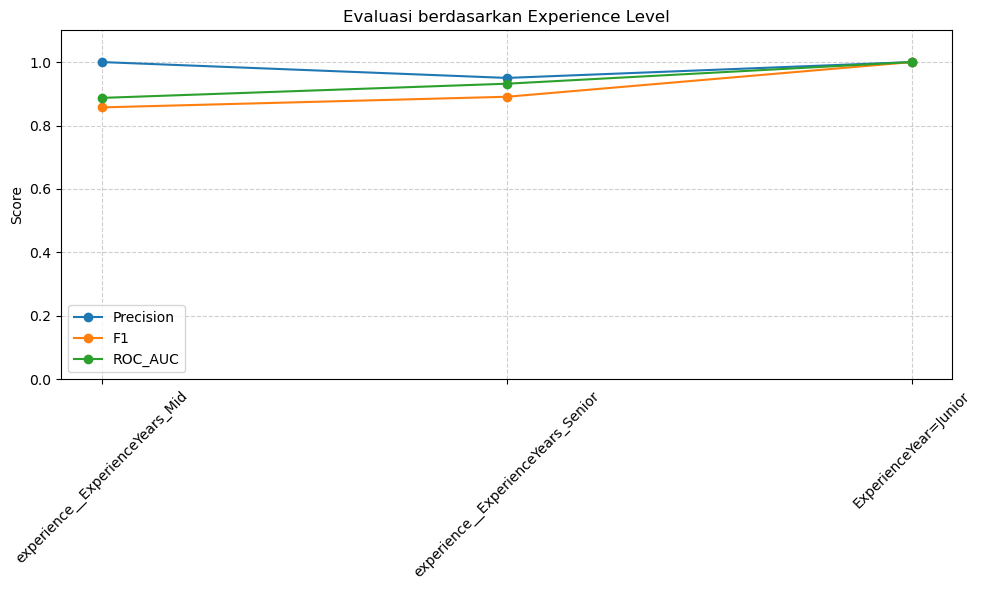

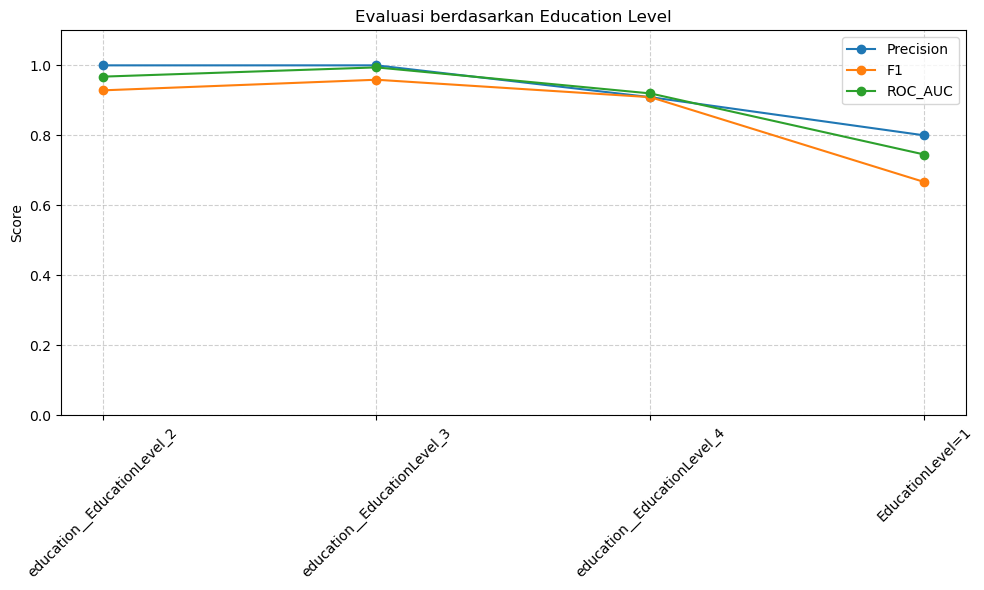

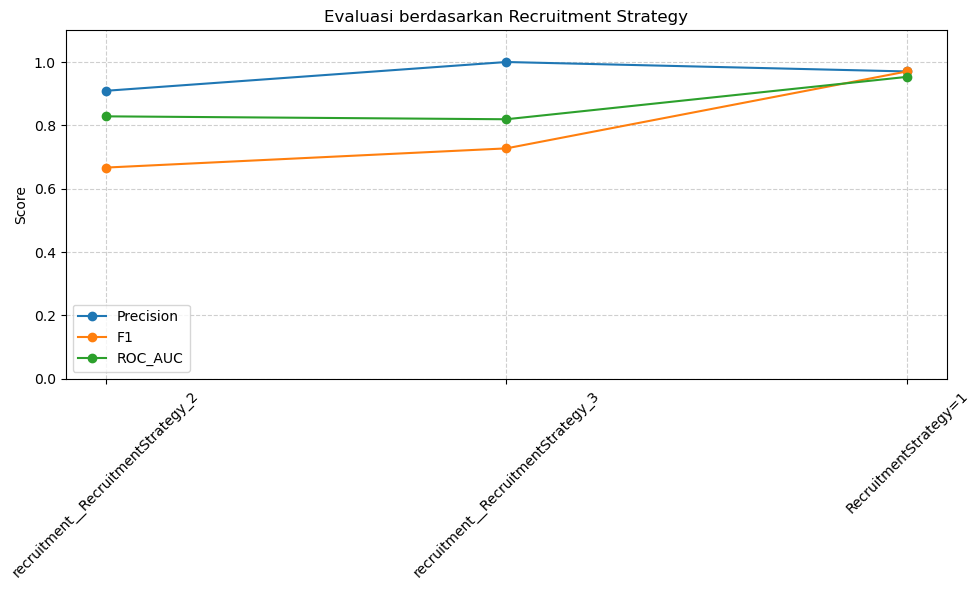

In [65]:
import matplotlib.pyplot as plt

def plot_subset_results_auto(df, title, metrics=["Precision", "F1", "ROC_AUC"]):
    """
    Plot hasil evaluasi subset secara otomatis.
    df      : DataFrame hasil evaluate_by_subset
    title   : Judul grafik
    metrics : List metrik yang mau ditampilkan
    """
    x = range(len(df))
    
    plt.figure(figsize=(10,6))
    for metric in metrics:
        if metric in df.columns:  # hanya plot kalau metrik tersedia
            plt.plot(x, df[metric], marker="o", label=metric)
    
    plt.xticks(x, df["Subset"], rotation=45)
    plt.ylim(0, 1.1)
    plt.title(title)
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


# ================
# Contoh pemakaian
# ================
plot_subset_results_auto(exp_results, "Evaluasi berdasarkan Experience Level")
plot_subset_results_auto(edu_results, "Evaluasi berdasarkan Education Level")
plot_subset_results_auto(recruitment_results, "Evaluasi berdasarkan Recruitment Strategy")


In [82]:
def evaluate_numeric_by_bins(model, pipeline, X_raw, y, feature, bins=3):
    """
    Evaluasi model berdasarkan subset dari fitur numerik yang dibagi dalam bins.
    Label bin: Low, Medium, High agar lebih mudah diinterpretasi.
    Model dievaluasi dengan Precision, F1, dan ROC AUC.
    """
    results = []

    # label bin kustom
    bin_labels = ["Low", "Medium", "High"][:bins]

    # buat bin dengan qcut
    feature_values = X_raw[feature]
    X_bins = pd.qcut(feature_values, q=bins, labels=bin_labels, duplicates="drop")

    # transformasi full dataset sekali saja
    X_transformed = pipeline.transform(X_raw)

    for bin_label in X_bins.unique():
        subset_idx = X_bins[X_bins == bin_label].index
        if len(subset_idx) == 0:
            continue

        X_sub = X_transformed[subset_idx]
        y_sub = y.loc[subset_idx]

        y_pred = model.predict(X_sub)

        # hitung metrik
        precision = precision_score(y_sub, y_pred, zero_division=0)
        f1 = f1_score(y_sub, y_pred, zero_division=0)
        try:
            y_prob = model.predict_proba(X_sub)[:, 1]
            roc_auc = roc_auc_score(y_sub, y_prob)
        except:
            roc_auc = None

        results.append({
            "Feature": feature,
            "Subset": bin_label,
            "Samples": len(y_sub),
            "Precision": precision,
            "F1": f1,
            "ROC_AUC": roc_auc
        })

    return pd.DataFrame(results)


# ======================
# Contoh pemakaian
# ======================
interview_results = evaluate_numeric_by_bins(loaded_model, loaded_pipeline, X_test, y_test, "InterviewScore", bins=3)
skill_results     = evaluate_numeric_by_bins(loaded_model, loaded_pipeline, X_test, y_test, "SkillScore", bins=3)
personality_results = evaluate_numeric_by_bins(loaded_model, loaded_pipeline, X_test, y_test, "PersonalityScore", bins=3)

display(interview_results)
display(skill_results)
display(personality_results)


# Buat path lengkap untuk file Excel
file_path = os.path.join(folder_path, 'interview_results.xlsx')
# Asumsikan 'hasil_evaluasi' adalah DataFrame
interview_results.to_excel(file_path, index=True)

file_path = os.path.join(folder_path, 'skill_results.xlsx')
# Asumsikan 'hasil_evaluasi' adalah DataFrame
skill_results.to_excel(file_path, index=True)

file_path = os.path.join(folder_path, 'personality_results.xlsx')
# Asumsikan 'hasil_evaluasi' adalah DataFrame
personality_results.to_excel(file_path, index=True)

print(f"Hasil evaluasi telah berhasil disimpan ke: {file_path}")


,Feature,Subset,Samples,Precision,F1,ROC_AUC
0,InterviewScore,High,100,0.941176,0.901408,0.938009
1,InterviewScore,Medium,94,1.000000,0.888889,0.927536
2,InterviewScore,Low,106,0.964286,0.915254,0.947097


,Feature,Subset,Samples,Precision,F1,ROC_AUC
0,SkillScore,High,100,1.00,0.943820,0.959053
1,SkillScore,Low,101,1.00,0.810811,0.876295
2,SkillScore,Medium,99,0.88,0.897959,0.973889


,Feature,Subset,Samples,Precision,F1,ROC_AUC
0,PersonalityScore,Low,101,0.960000,0.888889,0.902059
1,PersonalityScore,High,98,0.972222,0.933333,0.962190
2,PersonalityScore,Medium,101,0.952381,0.869565,0.951053


Hasil evaluasi telah berhasil disimpan ke: file_exp\personality_results.xlsx


In [84]:
from sklearn.metrics import precision_score, f1_score, roc_auc_score

def evaluate_numeric_by_bins(model, pipeline, X_raw, y, feature, bins=3):
    results = []
    bin_labels = ["Low", "Medium", "High"][:bins]

    feature_values = X_raw[feature]
    X_bins = pd.qcut(feature_values, q=bins, labels=bin_labels, duplicates="drop")
    X_transformed = pipeline.transform(X_raw)

    for bin_label in bin_labels:
        subset_idx = X_bins[X_bins == bin_label].index
        if len(subset_idx) == 0:
            continue

        X_sub = X_transformed[subset_idx]
        y_sub = y.loc[subset_idx]

        y_pred = model.predict(X_sub)

        precision = precision_score(y_sub, y_pred, zero_division=0)
        f1 = f1_score(y_sub, y_pred, zero_division=0)
        try:
            y_prob = model.predict_proba(X_sub)[:, 1]
            roc_auc = roc_auc_score(y_sub, y_prob)
        except:
            roc_auc = None

        results.append({
            "Feature": feature,
            "Subset": bin_label,
            "Samples": len(y_sub),
            "Precision": precision,
            "F1": f1,
            "ROC_AUC": roc_auc
        })

    df = pd.DataFrame(results)
    df["Subset"] = pd.Categorical(df["Subset"], categories=bin_labels, ordered=True)
    return df.sort_values(["Feature", "Subset"]).reset_index(drop=True)


def evaluate_all_numeric(model, pipeline, X_raw, y, features, bins=3):
    all_results = []
    for feature in features:
        df_feature = evaluate_numeric_by_bins(model, pipeline, X_raw, y, feature, bins)
        all_results.append(df_feature)
    return pd.concat(all_results, ignore_index=True)


# ======================
# Contoh pemakaian
# ======================
numeric_features = ["InterviewScore", "SkillScore", "PersonalityScore"]

results_seg_num = evaluate_all_numeric(
    loaded_model, loaded_pipeline, X_test, y_test, numeric_features, bins=3
)

display(results_seg_num )


# # # Nama folder yang diinginkan
folder_path = 'file_exp'

# Cek apakah folder sudah ada, jika tidak, buat folder tersebut
if not os.path.exists(folder_path):
    os.path.makedirs(folder_path)
    print(f"Folder '{folder_path}' berhasil dibuat.")

# Buat path lengkap untuk file Excel
file_path = os.path.join(folder_path, 'results_seg_num.xlsx')
# Asumsikan 'hasil_evaluasi' adalah DataFrame
results_seg_num.to_excel(file_path, index=True)

print(f"Hasil evaluasi telah berhasil disimpan ke: {file_path}")


,Feature,Subset,Samples,Precision,F1,ROC_AUC
0,InterviewScore,Low,106,0.964286,0.915254,0.947097
1,InterviewScore,Medium,94,1.000000,0.888889,0.927536
2,InterviewScore,High,100,0.941176,0.901408,0.938009
3,SkillScore,Low,101,1.000000,0.810811,0.876295
4,SkillScore,Medium,99,0.880000,0.897959,0.973889
5,SkillScore,High,100,1.000000,0.943820,0.959053
6,PersonalityScore,Low,101,0.960000,0.888889,0.902059
7,PersonalityScore,Medium,101,0.952381,0.869565,0.951053
8,PersonalityScore,High,98,0.972222,0.933333,0.962190


Hasil evaluasi telah berhasil disimpan ke: file_exp\results_seg_num.xlsx


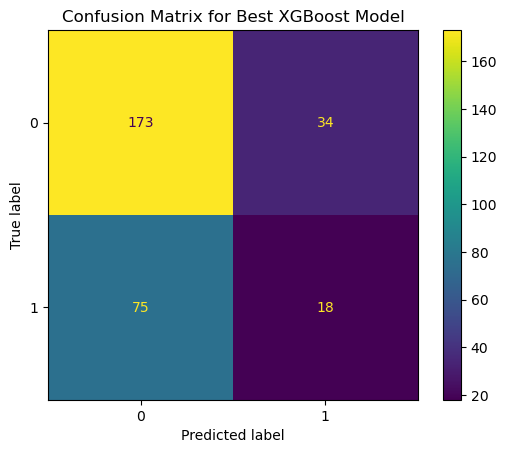

Confusion Matrix:
[[173  34]
 [ 75  18]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, prediction)

# Tampilkan visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgboost_model.classes_)
disp.plot()

# Tambahkan judul dan tampilkan plot
plt.title('Confusion Matrix for Best XGBoost Model')
plt.show()

# Jika ingin melihat angkanya saja
print("Confusion Matrix:")
print(cm)

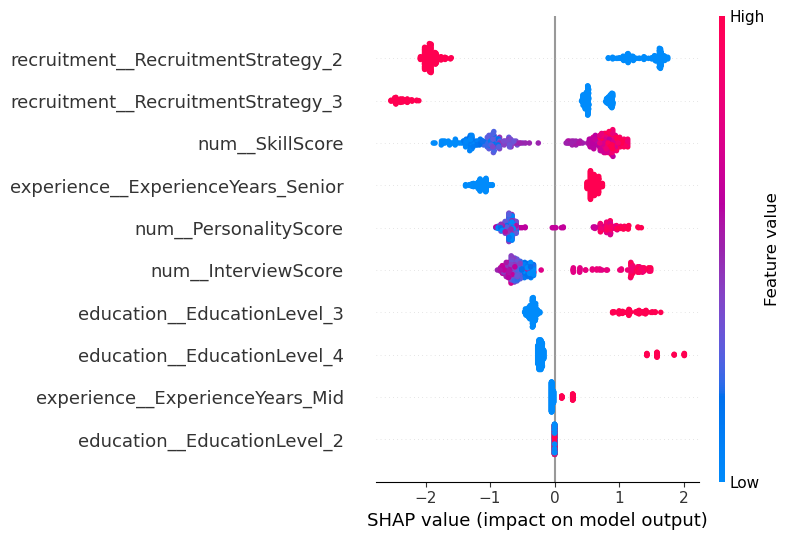

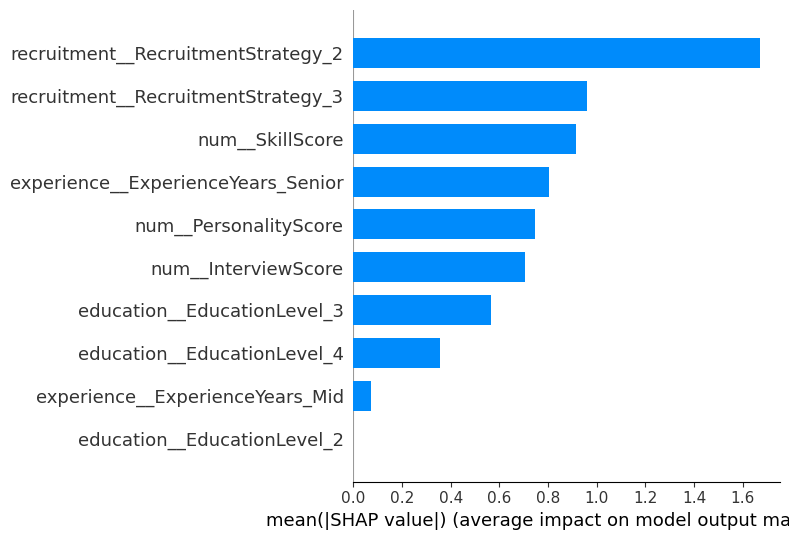

Instance index: 0


,EducationLevel,ExperienceYears,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,2,6,95,70,22,2


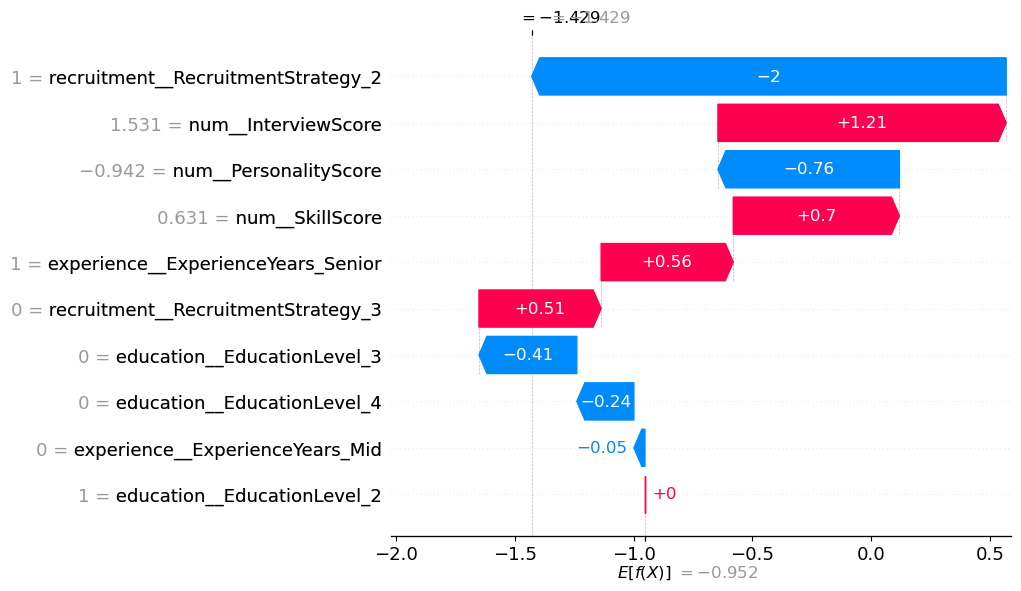

In [86]:
# SHAP explainers for tree models
import shap
import matplotlib.pyplot as plt
X_trans_df = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)
# 1) Try TreeExplainer (fast for tree models)
try:
    explainer = shap.TreeExplainer(loaded_model)          # XGBoost compatible
    shap_values = explainer.shap_values(X_trans_df)      # may return list or array depending on shap version
except Exception:
    # fallback: generic Explainer (slower but more general)
    explainer = shap.Explainer(loaded_model, X_trans_df)
    shap_values = explainer(X_trans_df)  # returns an Explanation object

# 2) Global: summary plot (bar + beeswarm)
plt.figure(figsize=(8,6))
try:
    # Newer shap: shap_values is an Explanation object or array
    shap.summary_plot(shap_values, X_trans_df, show=False)
    plt.tight_layout()
    plt.show()
except Exception:
    # If shap_values is nested list (multiclass), pick class 1 importance
    if isinstance(shap_values, list):
        shap.summary_plot(shap_values[1], X_trans_df, show=False)
        plt.tight_layout()
        plt.show()
    else:
        raise

# 3) Global bar plot (feature importance by mean absolute SHAP)
plt.figure(figsize=(8,6))
try:
    shap.summary_plot(shap_values, X_trans_df, plot_type="bar", show=False)
    plt.tight_layout()
    plt.show()
except Exception:
    if isinstance(shap_values, list):
        shap.summary_plot(shap_values[1], X_trans_df, plot_type="bar", show=False)
        plt.tight_layout()
        plt.show()

# 4) Local explanation for a single instance (pick index i)
i = 0  # change to any test-row index you want to inspect (use X_test.index positions)
row = X_trans_df.iloc[i:i+1]
print("Instance index:", row.index[0])
display(X_test.loc[row.index])  # show raw features (original)
# plot local force plot or waterfall
try:
    # newer shap: explainer(row) returns Explanation
    if hasattr(explainer, "__call__"):
        local_exp = explainer(row)
        shap.plots.waterfall(local_exp[0], show=True)
    else:
        shap.force_plot(explainer.expected_value, shap_values[i,:], row, matplotlib=True)
except Exception:
    # alternative: waterfall using values if available
    try:
        shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], row.iloc[0], feature_names=feature_names)
    except Exception as ex:
        print("Could not render local SHAP plot:", ex)


Dropped features (tidak masuk ke model): {'PersonalityScore', 'InterviewScore', 'ExperienceYears', 'EducationLevel', 'RecruitmentStrategy', 'SkillScore'}

=== Ranking Global Feature Importance (agregasi OHE) ===
recruitment    2.630082
num            2.366151
education      0.923137
experience     0.874736
dtype: float32


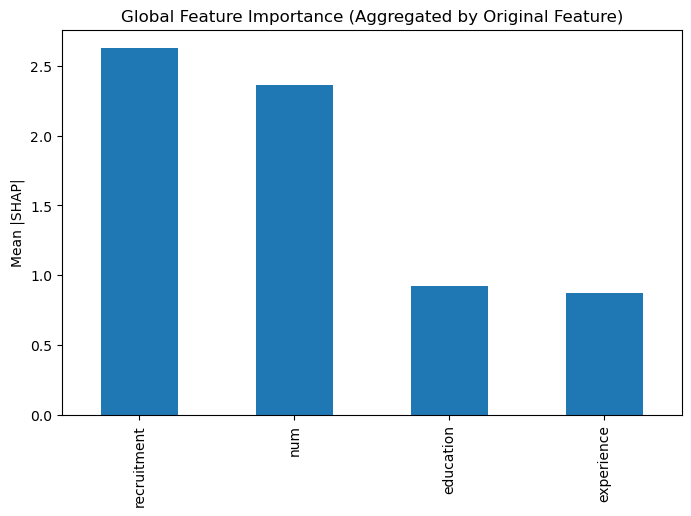

In [87]:
X_trans_df = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)

# ================================
# 2. Cari fitur asli & dropped
# ================================
original_features = set(X_test.columns)
transformed_features = set([f.split("__")[0] if "__" in f else f for f in feature_names])

dropped_features = original_features - transformed_features
print("Dropped features (tidak masuk ke model):", dropped_features)

# ================================
# 3. Hitung SHAP
# ================================
try:
    explainer = shap.TreeExplainer(loaded_model)
    shap_values = explainer.shap_values(X_trans_df)
except:
    explainer = shap.Explainer(loaded_model, X_trans_df)
    shap_values = explainer(X_trans_df)

# ambil shap_values array untuk binary (kelas 1)
if isinstance(shap_values, list):
    shap_vals_array = shap_values[1]
elif hasattr(shap_values, "values"):
    shap_vals_array = shap_values.values
else:
    shap_vals_array = shap_values

# ================================
# 4. Agregasi OHE ke fitur asli
# ================================
df_shap = pd.DataFrame(np.abs(shap_vals_array), columns=feature_names)
mean_abs_shap = df_shap.mean(axis=0)

# gabungkan by prefix sebelum "__"
mean_abs_shap_grouped = mean_abs_shap.groupby(lambda c: c.split("__")[0] if "__" in c else c).sum()
mean_abs_shap_grouped = mean_abs_shap_grouped.sort_values(ascending=False)

# ================================
# 5. Tampilkan ranking global
# ================================
print("\n=== Ranking Global Feature Importance (agregasi OHE) ===")
print(mean_abs_shap_grouped)

# ================================
# 6. Plot bar chart
# ================================
plt.figure(figsize=(8,5))
mean_abs_shap_grouped.plot(kind="bar")
plt.title("Global Feature Importance (Aggregated by Original Feature)")
plt.ylabel("Mean |SHAP|")
plt.show()

# ================================
# 7. Simpan ke CSV jika perlu
# ================================
mean_abs_shap_grouped.to_csv("feature_importance_shap.csv", header=["mean_abs_shap"])
